<a href="https://colab.research.google.com/github/IrinaBoyarchukova/OsnovePython/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_3_%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86_%D1%81_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://gbcdn.mrgcdn.ru/uploads/asset/4239332/attachment/7d8be3cf1f6192275f44c62047e51fc7.html
Будем работать с датасетом по оттоку клиентов из банка https://www.kaggle.com/datasets/shubh0799/churn-modelling, но датасет из себя будет представлять две таблицы:

Личные данные клиента

CustomerId - Уникальный идентификатор клиента
Surname - Фамилия клиента
Geography - Из какой страны клиент
Gender - Пол клиента
Age - Возраст клиента
EstimatedSalary - Предположительная зарплата клиента
Данные по поведению клиента в банке

CustomerId - Уникальный идентификатор клиента
CustomerId - Уникальный идентификатор клиента
Tenure - Сколько лет человек является клиентом банка
Balance - Баланс счета
NumOfProducts - Количество открытых продуктов
HasCrCard - Есть ли у клиента кредитная карта
IsActiveMember - Является ли клиент активные участником
Exited - Уйдет ли человек в отток

In [ ]:
import pandas as pd

In [ ]:
users = pd.read_csv('users.csv', sep=';')
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.1


In [ ]:
users.shape

(10000, 6)

# Создание новых признаков

In [ ]:
users['new_feature'] = 0
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature
0,15634602,Hargrave,France,Female,42,101348.88,0
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
4,15737888,Mitchell,Spain,Female,43,79084.1,0


Переведем признак возраста из годов в дни

In [ ]:
users['Age'] * 365

0       15330
1       14965
2       15330
3       14235
4       15695
        ...  
9995    14235
9996    12775
9997    13140
9998    15330
9999    10220
Name: Age, Length: 10000, dtype: int64

In [ ]:
users['Age (days)'] = users['Age'] * 365
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Age (days)
0,15634602,Hargrave,France,Female,42,101348.88,0,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235
4,15737888,Mitchell,Spain,Female,43,79084.1,0,15695


In [ ]:
# Создание нового признака через цикл
for i, row in users.iloc[:2].iterrows():
    print(row)
    print('__' * 30)

CustomerId          15634602
Surname             Hargrave
Geography             France
Gender                Female
Age                       42
EstimatedSalary    101348.88
new_feature                0
Age (days)             15330
Name: 0, dtype: object
____________________________________________________________
CustomerId          15647311
Surname                 Hill
Geography              Spain
Gender                Female
Age                       41
EstimatedSalary    112542.58
new_feature                0
Age (days)             14965
Name: 1, dtype: object
____________________________________________________________


In [ ]:

age_days = []

for i, row in users.iterrows():
    age_days.append(row['Age'] * 365)

age_days[:10]

[15330, 14965, 15330, 14235, 15695, 16060, 18250, 10585, 16060, 9855]

In [ ]:
# Массив записать в новый признак
users['Age (days) 2'] = age_days
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Age (days),Age (days) 2
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.1,0,15695,15695


In [ ]:
# Цикл длинный, лучше использовать встроенный метод, третий признак возврат в днях
def age_to_days(x):
    return x * 365

users['Age (days) 3'] = users['Age'].apply(age_to_days)
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Age (days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.1,0,15695,15695,15695


In [ ]:
# Вывод сколко строчек мы прошли
import time
from tqdm import tqdm
tqdm.pandas()


def age_to_days(x):
    time.sleep(0.001) # Засыпание на долю секунды
    return x * 365

users['Age'].progress_apply(age_to_days)

100%|██████████| 10000/10000 [00:11<00:00, 886.70it/s]


0       15330
1       14965
2       15330
3       14235
4       15695
        ...  
9995    14235
9996    12775
9997    13140
9998    15330
9999    10220
Name: Age, Length: 10000, dtype: int64

# Удаление признаков

In [ ]:
users.drop(columns='new_feature') # Удаление колонок
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Age (days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.1,0,15695,15695,15695


In [ ]:
users = users.drop(columns='new_feature')
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Age (days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.1,15695,15695,15695


In [ ]:
users['new_feature'] = 0

In [ ]:
users.drop(columns='new_feature', inplace=True)
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Age (days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.1,15695,15695,15695


In [ ]:
users.drop(columns=['Age (days)', 'Age (days) 2', 'Age (days) 3'], inplace=True)
users.head() # Удаление ряда колонок при перезаписи

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.1


# Изменение существующих признаков
.loc

In [ ]:
users['target'] = 0
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,0
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
4,15737888,Mitchell,Spain,Female,43,79084.1,0


In [ ]:
users.loc[users['Geography'] == 'France'] # Выборка, что все люди живут во Франции

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
6,15592531,Bartlett,France,Male,50,10062.8,0
8,15792365,He,France,Male,44,74940.5,0
...,...,...,...,...,...,...,...
9994,15719294,Wood,France,Female,29,167773.55,0
9995,15606229,Obijiaku,France,Male,39,96270.64,0
9996,15569892,Johnstone,France,Male,35,101699.77,0
9997,15584532,Liu,France,Female,36,42085.58,0


In [ ]:
users.loc[users['Geography'] == 'France', 'target'] # Достаем признак таргета и перезаписываем на 1

0       0
2       0
3       0
6       0
8       0
       ..
9994    0
9995    0
9996    0
9997    0
9999    0
Name: target, Length: 5014, dtype: int64

In [ ]:
users[users['Geography'] == 'France']['target'] = 1 # Если работаем без loc, то мы работаем с копией Дата сета
users.head()

<ipython-input-43-b763340dfd50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users[users['Geography'] == 'France']['target'] = 1


,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,0
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
4,15737888,Mitchell,Spain,Female,43,79084.1,0


In [ ]:
users.loc[users['Geography'] == 'France', 'target'] = 1
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,1
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,1
3,15701354,Boni,France,Female,39,93826.63,1
4,15737888,Mitchell,Spain,Female,43,79084.1,0


.replace Изменение в декущих признаках, тоже можно делать

In [ ]:
users['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True) # Если нет inplace=True, то ничего не поменяется
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,F,42,101348.88,1
1,15647311,Hill,Spain,F,41,112542.58,0
2,15619304,Onio,France,F,42,113931.57,1
3,15701354,Boni,France,F,39,93826.63,1
4,15737888,Mitchell,Spain,F,43,79084.1,0


# Методы агрегации

In [ ]:
users['Age'].agg(['min', 'max']) # Минимальное и максимальное значение , это передача списка

min    18
max    92
Name: Age, dtype: int64

In [ ]:
users.agg({
    'Age': ['min', 'max'],
    'EstimatedSalary': 'mean'
})   #??????????????????????????????????????

ValueError: ignored

In [ ]:
users.agg(
    min_age=('Age', 'min'),
    max_age=('Age', 'max'),
    mean_salary=('EstimatedSalary', 'mean')
) # ?????????????????????????

ValueError: ignored

#Методы объединения

In [ ]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,2,0.00,1,1,1,1
1,15647311,608,1,83807.86,1,0,1,0
2,15619304,502,8,159660.80,3,1,0,1
3,15701354,699,1,0.00,2,0,0,0
4,15737888,850,2,125510.82,1,1,1,0


In [ ]:
bank.shape 

(10000, 8)

In [ ]:
merged = users.merge(bank, left_on='CustomerId', right_on='CustomerId')
merged.head() #Объединение 

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,France,F,42,101348.88,1,619,2,0.00,1,1,1,1
1,15647311,Hill,Spain,F,41,112542.58,0,608,1,83807.86,1,0,1,0
2,15619304,Onio,France,F,42,113931.57,1,502,8,159660.80,3,1,0,1
3,15701354,Boni,France,F,39,93826.63,1,699,1,0.00,2,0,0,0
4,15737888,Mitchell,Spain,F,43,79084.1,0,850,2,125510.82,1,1,1,0


In [ ]:
users_id = users.set_index('CustomerId')
users_id.head() # Объединение при помощи индекса

,Surname,Geography,Gender,Age,EstimatedSalary,target
CustomerId,,,,,,
15634602,Hargrave,France,F,42,101348.88,1
15647311,Hill,Spain,F,41,112542.58,0
15619304,Onio,France,F,42,113931.57,1
15701354,Boni,France,F,39,93826.63,1
15737888,Mitchell,Spain,F,43,79084.1,0


In [ ]:
bank_id = bank.set_index('CustomerId')
bank_id.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CustomerId,,,,,,,
15634602,619,2,0.00,1,1,1,1
15647311,608,1,83807.86,1,0,1,0
15619304,502,8,159660.80,3,1,0,1
15701354,699,1,0.00,2,0,0,0
15737888,850,2,125510.82,1,1,1,0


In [ ]:
bank_id.join(users_id).head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
CustomerId,,,,,,,,,,,,,
15634602,619,2,0.00,1,1,1,1,Hargrave,France,F,42,101348.88,1
15647311,608,1,83807.86,1,0,1,0,Hill,Spain,F,41,112542.58,0
15619304,502,8,159660.80,3,1,0,1,Onio,France,F,42,113931.57,1
15701354,699,1,0.00,2,0,0,0,Boni,France,F,39,93826.63,1
15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,F,43,79084.1,0


In [ ]:
bank_id.join(users_id).reset_index().head() # CustomerId	не индекс а признак

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,619,2,0.00,1,1,1,1,Hargrave,France,F,42,101348.88,1
1,15647311,608,1,83807.86,1,0,1,0,Hill,Spain,F,41,112542.58,0
2,15619304,502,8,159660.80,3,1,0,1,Onio,France,F,42,113931.57,1
3,15701354,699,1,0.00,2,0,0,0,Boni,France,F,39,93826.63,1
4,15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,F,43,79084.1,0


In [ ]:
bank.shape 

(10000, 8)

Атрибут how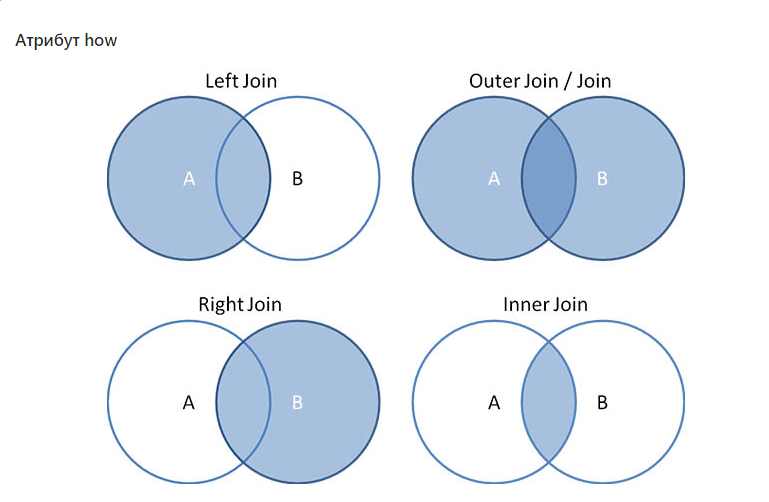

In [ ]:
toy_df1 = pd.DataFrame({
    'col_1': [1, 2, 3],
    'col_2': [9, 9, 9]
})

toy_df2 = pd.DataFrame({
    'col_1': [3, 4],
    'col_3': [0, 0]
})

display(toy_df1, toy_df2)

,col_1,col_2
0,1,9
1,2,9
2,3,9


,col_1,col_3
0,3,0
1,4,0


In [ ]:
toy_df1.merge(toy_df2, how='left')

,col_1,col_2,col_3
0,1,9,NaN
1,2,9,NaN
2,3,9,0.0


In [ ]:
toy_df1.merge(toy_df2, how='right')

,col_1,col_2,col_3
0,3,9.0,0
1,4,NaN,0


In [ ]:
toy_df1.merge(toy_df2, how='inner')

,col_1,col_2,col_3
0,3,9,0


In [ ]:
toy_df1.merge(toy_df2, how='outer')

,col_1,col_2,col_3
0,1,9.0,NaN
1,2,9.0,NaN
2,3,9.0,0.0
3,4,NaN,0.0


left

In [ ]:
merged_left = bank.merge(users, on='CustomerId', how='left')
merged_left.shape

(10000, 14)

In [ ]:
merged_left.isna().sum()

CustomerId         0
CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
Surname            0
Geography          0
Gender             0
Age                0
EstimatedSalary    0
target             0
dtype: int64

In [ ]:
merged_left[merged_left['Age'].isna()]

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target


In [ ]:
users[users['CustomerId'] == 15682355]

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
9998,15682355,Sabbatini,Germany,M,42,92888.52,0


right

In [ ]:
merged_right = bank.merge(users, on='CustomerId', how='right')
merged_right.shape

(10000, 14)

In [ ]:
merged_right.isna().sum()

CustomerId         0
CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
Surname            0
Geography          0
Gender             0
Age                0
EstimatedSalary    0
target             0
dtype: int64

In [ ]:
merged_right[merged_right['CreditScore'].isna()]

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target


In [ ]:
bank[bank['CustomerId'] == 15611325]

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
169,15611325,682,9,57929.81,2,0,0,0


inner

In [ ]:
merged_inner = bank.merge(users, on='CustomerId', how='inner')
merged_inner.shape

(10000, 14)

In [ ]:
merged_inner.isna().sum()

CustomerId         0
CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
Surname            0
Geography          0
Gender             0
Age                0
EstimatedSalary    0
target             0
dtype: int64

outer

In [ ]:
merged_outer = bank.merge(users, on='CustomerId', how='outer')
merged_outer.shape

(10000, 14)

In [ ]:
merged_outer.isna().sum()

CustomerId         0
CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
Surname            0
Geography          0
Gender             0
Age                0
EstimatedSalary    0
target             0
dtype: int64

## Методы группировок
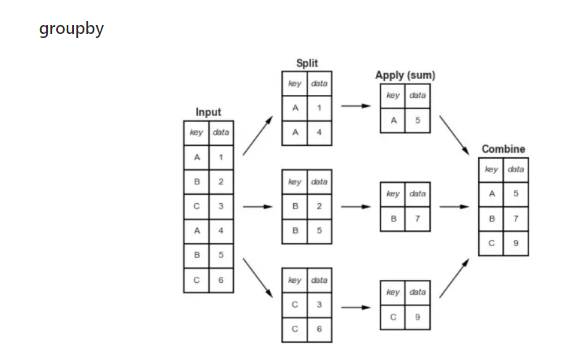

In [ ]:
toy_df = pd.DataFrame({
    'client_id': [1, 2, 2, 3, 1, 1],
    'item': ['chocolate', 'cheese', 'ham', 'candy', 'chair', 'book'],
    'price': [68, 280, 302, 39, 2099, 1089]
})

toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [ ]:
grouped = toy_df.groupby('client_id')
grouped

In [ ]:
grouped.groups

{1: [0, 4, 5], 2: [1, 2], 3: [3]}

In [ ]:
grouped.sum()

,price
client_id,
1,3256
2,582
3,39


In [ ]:
grouped.agg({'price': ['sum', 'min', 'max']})

price           
            sum  min   max
client_id                 
1          3256   68  2099
2           582  280   302
3            39   39    39

In [ ]:
users.groupby('Geography').agg({'Age': ['mean'], 'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,100075.1
Germany,39.771622,100127.71
Spain,38.890997,100015.79


pivot_table

In [ ]:
toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [ ]:
toy_df.pivot_table(index='client_id',
                   values='price',
                   aggfunc='sum')

,price
client_id,
1,3256
2,582
3,39


In [ ]:
users.pivot_table(index='Geography',
                  aggfunc={'Age': ['mean'], 'EstimatedSalary': 'min'})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,100075.1
Germany,39.771622,100127.71
Spain,38.890997,100015.79


In [ ]:
users.pivot_table(index='Geography',
                  columns='Gender', 
                  values='EstimatedSalary',
                  aggfunc='mean',
                  margins=True,
                  margins_name='Total')

/usr/local/lib/python3.8/dist-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


ValueError: ignored

crosstab

In [ ]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'])

Gender,F,M
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


In [ ]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            values=users['EstimatedSalary'],
            aggfunc='mean')

/usr/local/lib/python3.8/dist-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


Gender
Geography
France
Germany
Spain


In [ ]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='all')

Gender,F,M
Geography,,
France,0.2261,0.2753
Germany,0.1193,0.1316
Spain,0.1089,0.1388


In [ ]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='index')

Gender,F,M
Geography,,
France,0.450937,0.549063
Germany,0.475488,0.524512
Spain,0.439645,0.560355


In [ ]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='columns')

Gender,F,M
Geography,,
France,0.497689,0.504490
Germany,0.262602,0.241158
Spain,0.239709,0.254352


Встроенные визуализации

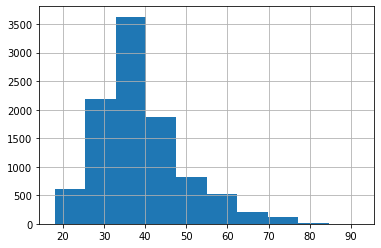

In [ ]:
users['Age'].hist();

In [ ]:
data = users.groupby('Gender').count()['Age']
data.name = 'Gender'
data

Gender
F    4543
M    5457
Name: Gender, dtype: int64

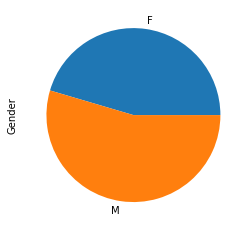

In [ ]:
data.plot.pie(y='Gender');

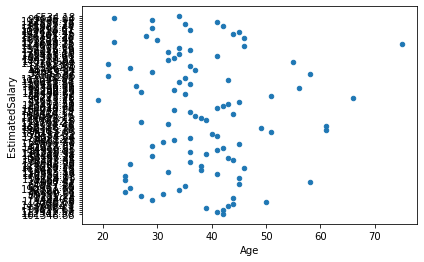

In [ ]:
users.iloc[:100].plot.scatter(x='Age', y='EstimatedSalary');

In [ ]:
data = bank.groupby('Tenure').count()['Balance']
data.name = 'num_clients'
data

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: num_clients, dtype: int64

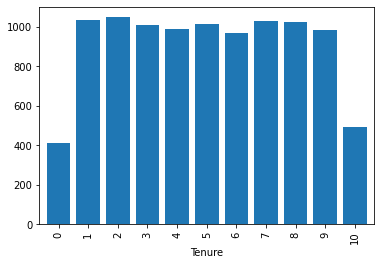

In [ ]:
data.plot.bar(width=0.8);